# ****Data set cleaning and preparation as model input

Welcome to my first notebook! 

I want to share with you the work I have done preparing the dataset for the model.

Feedbacks, comments, suggestions are very welcome!!
Thank you for reading it


In [1]:
data<-read.csv("../input/tmdb-box-office-prediction/train.csv")

In [2]:
#understanding the dataset
dim(data)
names(data)

[1] 3000   23

[1] "id"                    "belongs_to_collection" "budget"               
 [4] "genres"                "homepage"              "imdb_id"              
 [7] "original_language"     "original_title"        "overview"             
[10] "popularity"            "poster_path"           "production_companies" 
[13] "production_countries"  "release_date"          "runtime"              
[16] "spoken_languages"      "status"                "tagline"              
[19] "title"                 "Keywords"              "cast"                 
[22] "crew"                  "revenue"

- The dependent variable is data$revenue
- Some of the variables are not useful and will be deleted

# **Find the Predictors**

In order to determine which variables are useful predictors for the model I analyze each variable.

1. First, I delete the columns that I will not use.



In [3]:
#cleaning the data
data$ï..id<-NULL 
data$belongs_to_collection<-NULL
data$homepage<-NULL
data$poster_path<-NULL
data$original_title<-NULL
data$genres.1<-NULL
data$overview<-NULL
data$title.1<-NULL
data$Keywords<-NULL
data$status<-NULL
data$tagline<-NULL
data$imdb_id<-NULL
data$budget.1<-NULL
data$tagline.1<-NULL 

names(data)
dim(data)

[1] "id"                   "budget"               "genres"              
 [4] "original_language"    "popularity"           "production_companies"
 [7] "production_countries" "release_date"         "runtime"             
[10] "spoken_languages"     "title"                "cast"                
[13] "crew"                 "revenue"

[1] 3000   14

2. Variables **cast** and **crew**: 

There are many key positions in the film industry and (without understanding much of it) I assume the Director of the film could be crucial for the movie success and its revenue.
So, I filter the name of the director.

In [4]:
#create new variable

data.director<-data$crew
data.director<-as.data.frame(data.director)

library(tidyr)
director <- separate (data = data.director, col=data.director , into = c("left", "right"), sep = "\\'Director', 'name': ") 
director$left<-NULL
director2 <- separate (data = director, col=right , into = c("left", "right"), sep = "\\, 'profile_path':") 
director2$right<-NULL
rm(director,data.director)
library(stringi)
library(tm)
director2$left<-removePunctuation(director2$left)
data$director<-as.data.frame(director2)

#delete
rm(director2)
data$cast<-NULL
data$crew<-NULL 

names(data)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 169 rows [23, 31, 34, 74, 85, 122, 136, 156, 177, 178, 191, 217, 219, 234, 290, 317, 333, 341, 350, 358, ...].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 16 rows [471, 519, 681, 907, 935, 1304, 1618, 1784, 2015, 2303, 2385, 2449, 2519, 2624, 2884, 2966].”
Warning message:
“Expected 2 pieces. Additional pieces discarded in 2768 rows [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...].”
Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:httr’:

    content




[1] "id"                   "budget"               "genres"              
 [4] "original_language"    "popularity"           "production_companies"
 [7] "production_countries" "release_date"         "runtime"             
[10] "spoken_languages"     "title"                "revenue"             
[13] "director"

In [5]:
sum(is.na(data$director)) #those 16 were NAs or empty cells in the original dataset

[1] 16

Creating **dummy variables** for the most frequent directors names.
For this, I do text mining:

In [6]:
install.packages("RWeka")
install.packages("tm")
install.packages("textmineR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
#text mining
library(textmineR)
library(tm)
library(RWeka)

texto<-data$director
texto<-tolower(texto)
texto<-removePunctuation(texto)
texto<-removeNumbers(texto)
texto<-stripWhitespace(texto)

vocabulario<-VCorpus(VectorSource(texto))

bigramTokenizer2<-function(x){NGramTokenizer(x,Weka_control(min=2,max=2))
}
tdm.bigram2=TermDocumentMatrix(vocabulario,control=list(tokenize=bigramTokenizer2))
tdm.bigram2<-as.matrix(tdm.bigram2)
v <- sort(rowSums(tdm.bigram2),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d,n=20)

#delete
rm(d,tdm.bigram2,vocabulario,texto,v)


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘textmineR’


The following object is masked from ‘package:Matrix’:

    update


The following object is masked from ‘package:stats’:

    update




,word,freq
,<fct>,<dbl>
clint eastwood,clint eastwood,11
ron howard,ron howard,11
steven spielberg,steven spielberg,10
blake edwards,blake edwards,9
woody allen,woody allen,9
alfred hitchcock,alfred hitchcock,8
brian de,brian de,8
de palma,de palma,8
ford coppola,ford coppola,8


In [8]:
## Select most frequent directors (freq=11,10,9,8)

#using new variable "newtable"
newtable<-data$director
data$director<-NULL 

#problem with "byron howard" and "ron howard", change it to "b."
newtable<-gsub("Byron","b.",newtable$left)
newtable<-as.data.frame(newtable)
names(newtable)<-"left"

#create columns
newtable$dir.eastwood<-ifelse(stri_detect_fixed(tolower(newtable$left), 'clint eastwood'),1, 0)
newtable$dir.howard<-ifelse(stri_detect_fixed(tolower(newtable$left), 'ron howard'),1, 0)
newtable$dir.spielberg<-ifelse(stri_detect_fixed(tolower(newtable$left), 'steven spielberg'),1, 0)
newtable$dir.edwards<-ifelse(stri_detect_fixed(tolower(newtable$left), 'blake edwards'),1, 0)
newtable$dir.allen<-ifelse(stri_detect_fixed(tolower(newtable$left), 'woody allen'),1, 0)
newtable$dir.hitchcock<-ifelse(stri_detect_fixed(tolower(newtable$left), 'alfred hitchcock'),1, 0)
newtable$dir.depalma<-ifelse(stri_detect_fixed(tolower(newtable$left), 'brian de palma'),1, 0)
newtable$dir.coppola<-ifelse(stri_detect_fixed(tolower(newtable$left), 'francis ford coppola'),1, 0)
newtable$dir.scorsese<-ifelse(stri_detect_fixed(tolower(newtable$left), 'martin scorsese'),1, 0)
newtable$dir.bay<-ifelse(stri_detect_fixed(tolower(newtable$left), 'michael bay'),1, 0)
newtable$dir.anderson<-ifelse(stri_detect_fixed(tolower(newtable$left), 'paul ws anderson'),1, 0)
newtable$dir.soderbergh<-ifelse(stri_detect_fixed(tolower(newtable$left), 'steven soderbergh'),1, 0)
newtable$dir.craven<-ifelse(stri_detect_fixed(tolower(newtable$left), 'wes craven'),1, 0)

newtable$left<-NULL 

data<-cbind(data,newtable)
rm(newtable)

**3. Genres.**

Movie genres are important aspects for describing and could be relevant for the model. 
Another aspect related to this and interesting for analyze is the number of genres that the movie combines.

In [9]:
#3.1. Number of genres

install.packages("stringr")
library(stringr)
data$num.genres<-str_count(data$genres, 'name')

#3.2. separate genres

library(stringi)
data$genres<-tolower(data$genres)

data$genre.comedy<-ifelse(stri_detect_fixed(data$genres, 'comedy'),1, 0)
data$genre.drama<-ifelse(stri_detect_fixed(data$genres, 'drama'),1, 0)
data$genre.family<-ifelse(stri_detect_fixed(data$genres, 'family'),1, 0)
data$genre.romance<-ifelse(stri_detect_fixed(data$genres, 'romance'),1, 0)
data$genre.thriller<-ifelse(stri_detect_fixed(data$genres, 'thriller'),1, 0)
data$genre.action<-ifelse(stri_detect_fixed(data$genres, 'action'),1, 0)
data$genre.animation<-ifelse(stri_detect_fixed(data$genres, 'animation'),1, 0)
data$genre.adventure<-ifelse(stri_detect_fixed(data$genres, 'adventure'),1, 0)
data$genre.horror<-ifelse(stri_detect_fixed(data$genres, 'horror'),1, 0)
data$genre.documentary<-ifelse(stri_detect_fixed(data$genres, 'documentary'),1, 0)
data$genre.music<-ifelse(stri_detect_fixed(data$genres, 'music'),1, 0)
data$genre.crime<-ifelse(stri_detect_fixed(data$genres, 'crime'),1, 0)
data$genre.sciencefiction<-ifelse(stri_detect_fixed(data$genres, 'science fiction'),1, 0)
data$genre.mystery<-ifelse(stri_detect_fixed(data$genres, 'mystery'),1, 0)

data$genres<-NULL 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**3. Release date**

Possible predictors associated to this variable could be how old the movie is, the year/day/month of release, season or weekday. The old of the movie was discarded because it would change every day and would not be exactly the same if the model was used, for example, the next day. The season was also discarded because it changes depending on the hemisphere. That is why I chose: year/day/month of release and weekday.

In [10]:
#3.1 Day, month and year of release

library(reshape)
data$release_date<-as.character(data$release_date)
df <- transform(data$release_date, release_date = colsplit(data$release_date, split = "\\/", names = c("month","day","year2digits")))

names(df)<-c("date", "month.released","day.released","year.released")

df$year.released<-ifelse(df$year.released<10, paste0("0", df$year.released),df$year.released)
df$year.released <- ifelse(as.integer(df$year.released) <= 20,  paste0('20', df$year.released), paste0('19', df$year.released))

data<-cbind(data,df)

rm(df)
data$release_date<-NULL
data$date<-NULL

#3.2. Day of the week

data$weekday <- as.Date(with(data, paste(data$year.released, data$month.released, data$day.released,sep="-")), "%Y-%m-%d")
data$weekday<-weekdays(as.Date(data$weekday))

#check and change to factor
data$year.released<-as.factor(data$year.released)
data$month.released<-as.factor(data$month.released)
data$day.released<-as.factor(data$day.released)
data$weekday<-as.factor(data$weekday)


Attaching package: ‘reshape’


The following object is masked from ‘package:Matrix’:

    expand


The following objects are masked from ‘package:tidyr’:

    expand, smiths




**4. Languages**

Predictors could be the original language and the number of languages spoken in the movie.


In [11]:
#4.1. Number of languages
library(stringr)
data$num.languages<-str_count(data$spoken_languages, 'name')
data$spoken_languages<-NULL

#4.2. Original language: variable data$original_language


**5. Movie title**

The predictors chosen regarding movie title was the **number of characters** and the **number of words**.


In [12]:
#5.1. Number of characters: title length
data$title.length<-str_count(data$title) #caracteres
#5.2. Number of words
data$words.title<-str_count(data$title, '\\w+')

#delete column
data$title<-NULL

**6. Budget**

The budget is used as is it originally in the dataset. 

**7. Production company**

In the data set there are movies with more than one production company. The question would be, which companies influence the most? is the number of companies involved a good predictor?

In [13]:
#7.1. Number of production companies
library(stringi)
library(tm)
library(stringr)
data$num.companies<-str_count(data$production_companies, 'name')

#7.2. Productions company names

#as it was done with the directors name
#finding the 15 most frequent production companies

texto<-data$production_companies
texto<-tolower(texto)
texto<-removePunctuation(texto)
texto<-removeNumbers(texto)
texto<-stripWhitespace(texto)
texto<-gsub("id","",texto)
texto<-gsub("name","",texto)
#delete common words
texto<-gsub("pictures","",texto)
texto<-gsub("productions","",texto)
texto<-gsub("films","",texto)
texto<-gsub("entertainment","",texto)
texto<-gsub("film","",texto)
texto<-gsub("corporation","",texto)
vocabulario<-VCorpus(VectorSource(texto))
library(textmineR)
library(tm)
library(RWeka)
bigramTokenizer2<-function(x){NGramTokenizer(x,Weka_control(min=2,max=3))
}
tdm.bigram2=TermDocumentMatrix(vocabulario,control=list(tokenize=bigramTokenizer2))
tdm.bigram2<-as.matrix(tdm.bigram2)
v <- sort(rowSums(tdm.bigram2),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d,n=20)

rm(d,tdm.bigram2,vocabulario,texto,v)

,word,freq
,<fct>,<dbl>
warner bros,warner bros,220
century fox,century fox,152
twentieth century,twentieth century,150
twentieth century fox,twentieth century fox,150
metrogoldwynmayer mgm,metrogoldwynmayer mgm,84
walt disney,walt disney,83
new line,new line,76
line cinema,line cinema,75
new line cinema,new line cinema,75


In [14]:
#dummy variables

data$warner<-ifelse(stri_detect_fixed(tolower(data$production_companies), 'warner'),1, 0)
data$paramount<-ifelse(stri_detect_fixed(tolower(data$production_companies), 'paramount'),1, 0)
data$tcfox<-ifelse(stri_detect_fixed(tolower(data$production_companies), 'twentieth'),1, 0)
data$columbia<-ifelse(stri_detect_fixed(tolower(data$production_companies), 'columbia'),1, 0)
data$mgm<-ifelse(stri_detect_fixed(tolower(data$production_companies), 'mgm'),1, 0)
data$disney<-ifelse(stri_detect_fixed(tolower(data$production_companies), 'disney'),1, 0)
data$newline<-ifelse(stri_detect_fixed(tolower(data$production_companies), 'new line'),1, 0)
data$touchstone<-ifelse(stri_detect_fixed(tolower(data$production_companies), 'touchstone'),1, 0)
data$tristar<-ifelse(stri_detect_fixed(tolower(data$production_companies), 'tristar'),1, 0)
data$relativity<-ifelse(stri_detect_fixed(tolower(data$production_companies), 'relativity media'),1, 0)
data$uartists<-ifelse(stri_detect_fixed(tolower(data$production_companies), 'united artists'),1, 0)
data$vroadshow<-ifelse(stri_detect_fixed(tolower(data$production_companies), 'village roadshow'),1, 0)
data$regency<-ifelse(stri_detect_fixed(tolower(data$production_companies), 'regency enterprises'),1, 0)
data$BBC<-ifelse(stri_detect_fixed(tolower(data$production_companies), 'bbc'),1, 0)
data$workingtitle<-ifelse(stri_detect_fixed(tolower(data$production_companies), 'working title'),1, 0)

data$production_companies<-NULL

8. Production country

Predictors: number of countries, 15 most frequent countries.
Same steps as before.

In [15]:
#8.1. Number of countries involved

data$num.countries<-str_count(data$production_countries, 'name')

#8.2. Which countries

#15 most mentioned countries:
texto<-data$production_countries
texto<-tolower(texto)
texto<-removePunctuation(texto)
texto<-removeNumbers(texto)
texto<-stripWhitespace(texto)
texto<-gsub("id","",texto)
texto<-gsub("name","",texto)
texto<-gsub("iso","",texto)
vocabulario<-VCorpus(VectorSource(texto))
library(textmineR)
library(tm)
library(RWeka)
bigramTokenizer2<-function(x){NGramTokenizer(x,Weka_control(min=2,max=2))
}
tdm.bigram2=TermDocumentMatrix(vocabulario,control=list(tokenize=bigramTokenizer2))
tdm.bigram2<-as.matrix(tdm.bigram2)
v <- sort(rowSums(tdm.bigram2),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d,n=20)

rm(d,tdm.bigram2,vocabulario,texto,v)





,word,freq
,<fct>,<dbl>
of america,of america,2282
states of,states of,2282
united states,united states,2282
us united,us united,2282
gb united,gb united,380
united kingdom,united kingdom,380
fr france,fr france,222
kingdom us,kingdom us,179
de germany,de germany,167


In [16]:
#dummy variables


data$USA<-ifelse(stri_detect_fixed(tolower(data$production_countries), 'us'),1, 0)
data$GreatBritain<-ifelse(stri_detect_fixed(tolower(data$production_countries), 'gb'),1, 0)
data$France<-ifelse(stri_detect_fixed(tolower(data$production_countries), 'fr'),1, 0)
data$Germany<-ifelse(stri_detect_fixed(tolower(data$production_countries), 'de'),1, 0)
data$Canada<-ifelse(stri_detect_fixed(tolower(data$production_countries), 'canada'),1, 0)
data$India<-ifelse(stri_detect_fixed(tolower(data$production_countries), 'in'),1, 0)
data$Italy<-ifelse(stri_detect_fixed(tolower(data$production_countries), 'italy'),1, 0)
data$Australia<-ifelse(stri_detect_fixed(tolower(data$production_countries), 'au'),1, 0)
data$Japan<-ifelse(stri_detect_fixed(tolower(data$production_countries), 'jp'),1, 0)
data$Russia<-ifelse(stri_detect_fixed(tolower(data$production_countries), 'ru'),1, 0)
data$Spain<-ifelse(stri_detect_fixed(tolower(data$production_countries), 'spain'),1, 0)
data$China<-ifelse(stri_detect_fixed(tolower(data$production_countries), 'cn'),1, 0)
data$HongKong<-ifelse(stri_detect_fixed(tolower(data$production_countries), 'hk'),1, 0)
data$Ireland<-ifelse(stri_detect_fixed(tolower(data$production_countries), 'ie'),1, 0)
data$SouthKorea<-ifelse(stri_detect_fixed(tolower(data$production_countries), 'kr'),1, 0)

data$production_countries<-NULL


In [17]:
#data set ready to use
dim(data)
names(data)

[1] 3000   73

[1] "id"                   "budget"               "original_language"   
 [4] "popularity"           "runtime"              "revenue"             
 [7] "dir.eastwood"         "dir.howard"           "dir.spielberg"       
[10] "dir.edwards"          "dir.allen"            "dir.hitchcock"       
[13] "dir.depalma"          "dir.coppola"          "dir.scorsese"        
[16] "dir.bay"              "dir.anderson"         "dir.soderbergh"      
[19] "dir.craven"           "num.genres"           "genre.comedy"        
[22] "genre.drama"          "genre.family"         "genre.romance"       
[25] "genre.thriller"       "genre.action"         "genre.animation"     
[28] "genre.adventure"      "genre.horror"         "genre.documentary"   
[31] "genre.music"          "genre.crime"          "genre.sciencefiction"
[34] "genre.mystery"        "month.released"       "day.released"        
[37] "year.released"        "weekday"              "num.languages"       
[40] "title.length"         "words.title"          "num.companies"       
[43] "warner"               "paramount"            "tcfox"               
[46] "columbia"             "mgm"                  "disney"              
[49] "newline"              "touchstone"           "tristar"             
[52] "relativity"           "uartists"             "vroadshow"           
[55] "regency"              "BBC"                  "workingtitle"        
[58] "num.countries"        "USA"                  "GreatBritain"        
[61] "France"               "Germany"              "Canada"              
[64] "India"                "Italy"                "Australia"           
[67] "Japan"                "Russia"               "Spain"               
[70] "China"                "HongKong"             "Ireland"             
[73] "SouthKorea"

**9. Model: first approach**

I used a gradient boosting model





Attaching package: ‘caTools’


The following object is masked from ‘package:RWeka’:

    LogitBoost


Loaded gbm 2.1.5



gbm(formula = revenue ~ ., distribution = "gaussian", data = training, 
    n.trees = 500, interaction.depth = 10, shrinkage = 0.01, 
    cv.folds = 100)
A gradient boosted model with gaussian loss function.
500 iterations were performed.
The best cross-validation iteration was 381.
There were 72 predictors of which 29 had non-zero influence.


,var,rel.inf
,<fct>,<dbl>
budget,budget,47.208989146
day.released,day.released,16.417650460
popularity,popularity,15.270255526
year.released,year.released,12.879123333
month.released,month.released,3.070157396
runtime,runtime,1.234564853
weekday,weekday,0.829285830
genre.animation,genre.animation,0.665967120
genre.adventure,genre.adventure,0.647725518


[1] 83300364

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



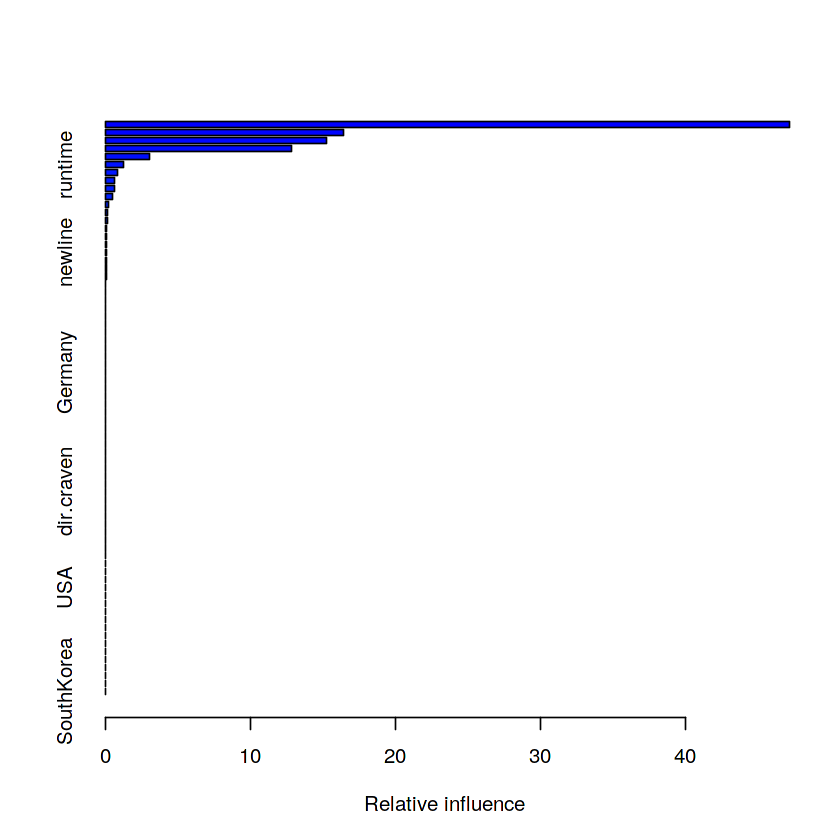

[1] 247
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 500 
Equivalent Number of Parameters: 39.85 
Residual Standard Error: 6.981e+12 


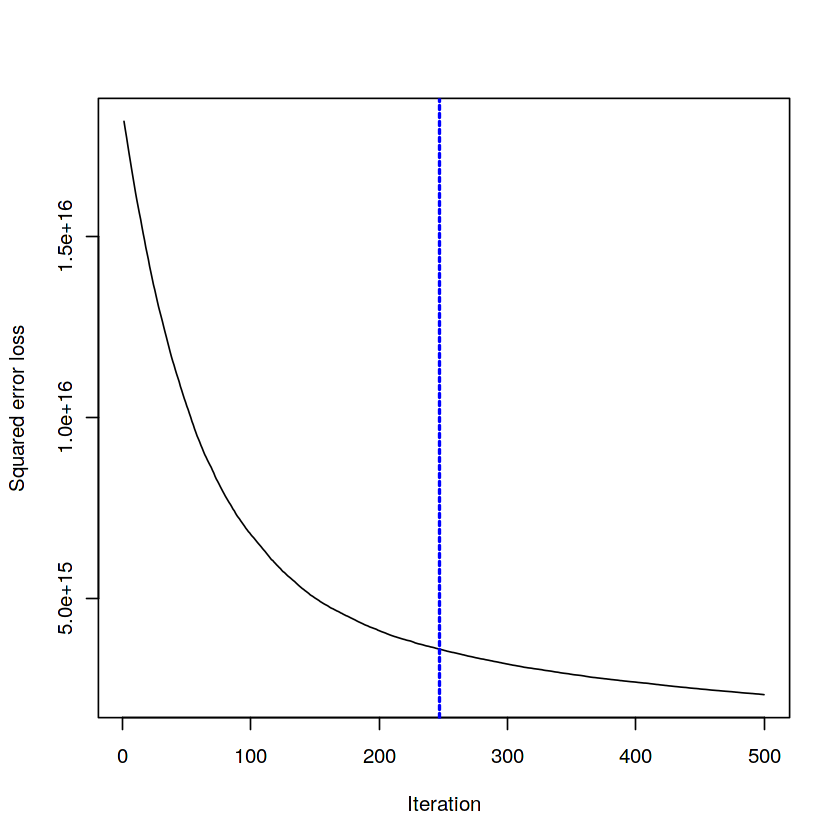

In [18]:
#keep the data set
data1<-data 

#split into test/train
library(caTools)
split <- sample.split(data1$revenue, SplitRatio = 0.75)
training <- subset(data1,split == TRUE) 
testing <- subset(data1,split == FALSE) 

#gradient boosting

library(gbm)
set.seed(1)  

gbm.model <- gbm(revenue ~ ., data = training, distribution = "gaussian", 
            n.trees = 500,shrinkage = 0.01,interaction.depth = 10,cv.folds = 100)

print(gbm.model)
summary(gbm.model)
sqrt(min(gbm.model$cv.error)) # get MSE and compute RMSE


best.iter <- gbm.perf(gbm.model, method = "OOB") 
print(best.iter) 

**10. Conclusion**

I still have to chose a better model or/and optimize the hyperparameters.


*I appreciate suggestions for furthers steps, improvements or other comments... thank you!
*
